# **Phase 2: PCA Analysis**

**Uploading the cleaned dataset after the preprocessing phase**

In [1]:
from google.colab import files
files.upload()

Saving 03_selected_features_dataset.csv to 03_selected_features_dataset.csv


{'03_selected_features_dataset.csv': b'age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_2,exang_0,exang_1,slope_0,slope_1,ca_0,ca_2,thal_1,thal_3,target\n0.9487264714397227,0.8214462122919168,-0.265039805171932,0.015306106301897814,0.7962997566660077,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0\n1.3920019083652986,1.7239052490013103,0.8512135993012008,-1.8353875639875028,0.011014724054777917,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1\n1.3920019083652986,-0.6826521822237388,-0.3492853451321684,-0.9100407288428025,1.0907816438952194,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1\n-1.9325638685765207,-0.08101282441747655,0.09300373965907287,1.645679101556846,1.9742273055828528,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0\n-1.4892884316509447,-0.08101282441747655,-0.8758199698836462,0.9847170764534886,-0.08714590502162592,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/03_selected_features_dataset.csv')

In [4]:
df.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,restecg_2,exang_0,exang_1,slope_0,slope_1,ca_0,ca_2,thal_1,thal_3,target
0,0.948726,0.821446,-0.265040,0.015306,0.796300,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,1.392002,1.723905,0.851214,-1.835388,0.011015,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,1.392002,-0.682652,-0.349285,-0.910041,1.090782,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1
3,-1.932564,-0.081013,0.093004,1.645679,1.974227,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
4,-1.489288,-0.081013,-0.875820,0.984717,-0.087146,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0


**Split Features and Target:** We do this so that PCA works only on the independent variables X and we keep the Target y to use later for classification or visualization

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = df.drop("target", axis=1)
y = df["target"]

**Apply PCA to the data:** Here we let PCA compute all components and measure the variance each one explains The goal is to understand the patterns and find the smallest number of components that are sufficient

In [6]:
pca = PCA()
X_pca = pca.fit_transform(X)

**Get explained variance ratio:** We calculate this to know how much information variance each principal component keeps

In [7]:
explain_var = pca.explained_variance_ratio_
cum_var = explain_var.cumsum()
print("Explained Variance Ratio:", explain_var)
print("Cumulative Explained Variance:", cum_var)

Explained Variance Ratio: [2.37839728e-01 1.43370594e-01 1.17389312e-01 1.04285162e-01
 7.59878976e-02 6.11620368e-02 5.48572919e-02 4.13709582e-02
 3.95801444e-02 2.89262139e-02 2.68659160e-02 2.30991064e-02
 1.96801910e-02 1.04080454e-02 7.99177341e-03 3.55922191e-03
 2.89907875e-03 7.27328976e-04 6.33201780e-19 0.00000000e+00
 0.00000000e+00]
Cumulative Explained Variance: [0.23783973 0.38121032 0.49859963 0.6028848  0.67887269 0.74003473
 0.79489202 0.83626298 0.87584312 0.90476934 0.93163525 0.95473436
 0.97441455 0.9848226  0.99281437 0.99637359 0.99927267 1.
 1.         1.         1.        ]


**Visualization - Scatter plot:** We plot the first two components PC1 and PC2 to visualize the data after dimensionality reduction We color by the target to see if there is a clear separation between the classes

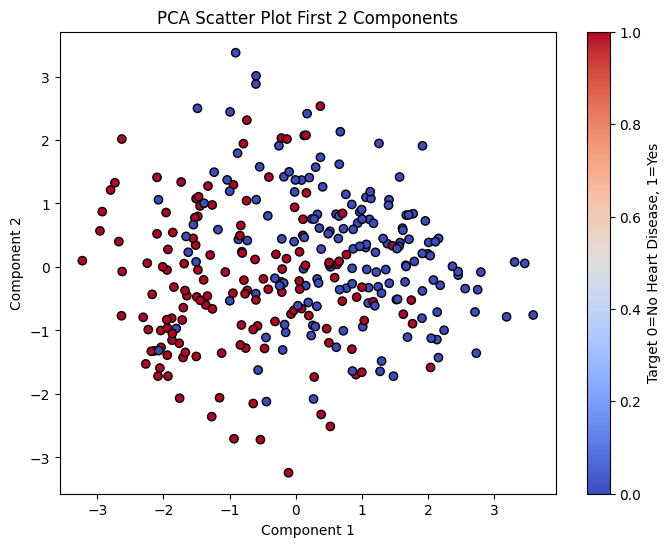

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA Scatter Plot First 2 Components")
plt.colorbar(label="Target 0=No Heart Disease, 1=Yes")
plt.show()

**Cumulative variance plot:** We plot this to decide how many components are enough to keep most of the information. For example, we may choose the number of PCs that explain 95% variance.

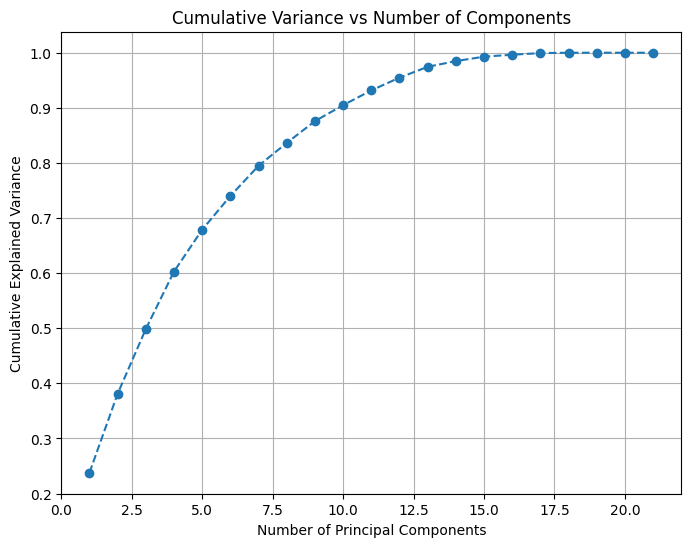

In [9]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance vs Number of Components")
plt.grid(True)
plt.show()

**Reapply PCA with the optimal number of components:** We set n_components=0.95: this means PCA will keep enough components to explain 95% of the variance This reduces the dimensionality of the data while preserving most of the information

In [10]:
pca_opt = PCA(n_components=0.95)
X_pca_opt = pca_opt.fit_transform(X)

print("Original shape:", X.shape)
print("PCA reduced shape 95% variance:", X_pca_opt.shape)

Original shape: (303, 21)
PCA reduced shape 95% variance: (303, 12)


In [11]:
display(X_pca_opt[:5])

array([[-0.86844467,  0.43481107,  0.72361163, -0.91588141,  0.51841528,
         0.47795874,  0.58809351, -0.51591605, -0.28998352, -0.02390106,
        -0.40003818,  0.58078125],
       [-2.9593697 ,  0.56820991, -0.55378496, -0.40701958, -0.49810626,
        -0.60418331,  0.43715346,  0.32078616, -0.67323509,  0.47976672,
        -0.77197293, -0.58479778],
       [-2.1381445 , -1.32206158, -0.03060035,  0.34909047,  0.46661728,
         1.04937201,  0.53377876,  0.29843845,  0.55919127,  0.13216504,
         0.09675328, -0.09753553],
       [ 1.66133577,  0.02696177,  2.76349449,  0.62099767,  0.52465337,
        -0.29716034, -0.61428431, -0.73479919,  0.09816361,  0.48755308,
         0.00989763, -0.38241421],
       [ 1.99499897,  0.2071329 ,  0.76225497, -0.30687123,  0.26201834,
        -0.80944891,  0.90071519,  0.52744802, -0.02207253, -0.56729655,
         0.16811836,  0.28558926]])

# Saving the tranformer to be used in new predictions:

In [12]:
import pickle

# Save the pca_opt transformer
with open('pca_transformer_opt.pkl', 'wb') as f:
    pickle.dump(pca_opt, f)

print("PCA transformer saved to pca_transformer_opt.pkl")

PCA transformer saved to pca_transformer_opt.pkl


**Convert PCA-reduced data to DataFrame:** Convert the `X_pca_opt` NumPy array into a pandas DataFrame.

In [13]:
X_pca_df = pd.DataFrame(X_pca_opt)
display(X_pca_df.head())

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.868445,0.434811,0.723612,-0.915881,0.518415,0.477959,0.588094,-0.515916,-0.289984,-0.023901,-0.400038,0.580781
1,-2.959370,0.568210,-0.553785,-0.407020,-0.498106,-0.604183,0.437153,0.320786,-0.673235,0.479767,-0.771973,-0.584798
2,-2.138145,-1.322062,-0.030600,0.349090,0.466617,1.049372,0.533779,0.298438,0.559191,0.132165,0.096753,-0.097536
3,1.661336,0.026962,2.763494,0.620998,0.524653,-0.297160,-0.614284,-0.734799,0.098164,0.487553,0.009898,-0.382414
4,1.994999,0.207133,0.762255,-0.306871,0.262018,-0.809449,0.900715,0.527448,-0.022073,-0.567297,0.168118,0.285589


**add the target column back to the dataset**

In [14]:
X_pca_df['target'] = y.values
display(X_pca_df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,target
0,-0.868445,0.434811,0.723612,-0.915881,0.518415,0.477959,0.588094,-0.515916,-0.289984,-0.023901,-0.400038,0.580781,0
1,-2.959370,0.568210,-0.553785,-0.407020,-0.498106,-0.604183,0.437153,0.320786,-0.673235,0.479767,-0.771973,-0.584798,1
2,-2.138145,-1.322062,-0.030600,0.349090,0.466617,1.049372,0.533779,0.298438,0.559191,0.132165,0.096753,-0.097536,1
3,1.661336,0.026962,2.763494,0.620998,0.524653,-0.297160,-0.614284,-0.734799,0.098164,0.487553,0.009898,-0.382414,0
4,1.994999,0.207133,0.762255,-0.306871,0.262018,-0.809449,0.900715,0.527448,-0.022073,-0.567297,0.168118,0.285589,0


**Save the PCA-reduced DataFrame to CSV:** Save the DataFrame to a new CSV file.

In [15]:
X_pca_df.to_csv('04_heart_disease_pca.csv', index=False)
print("PCA-reduced data saved to heart_disease_pca.csv")

PCA-reduced data saved to heart_disease_pca.csv


## Summary of PCA Analysis

In this phase, we performed Principal Component Analysis (PCA) on the preprocessed heart disease dataset. The goal of PCA is to reduce the dimensionality of the data while retaining as much of the original variance (information) as possible.

Here's what we did:

1.  **Split Features and Target:** We separated the features (independent variables) from the target variable, as PCA is applied only to the features.
2.  **Applied PCA:** We applied the PCA algorithm to the feature data. Initially, we allowed PCA to compute all possible components to analyze the explained variance.
3.  **Analyzed Explained Variance:** We examined the explained variance ratio for each component and the cumulative explained variance. This helped us understand how much information each component captured and how many components were needed to retain a significant portion of the total variance. The cumulative variance plot showed us that around 15 components explained 95% of the variance.
4.  **Reapplied PCA with Optimal Components:** Based on the variance analysis, we reapplied PCA, specifying `n_components=0.95`. This resulted in a reduced dataset with only 15 principal components, capturing 95% of the original data's variance.
5.  **Converted to DataFrame and Added Target:** The output of PCA is a NumPy array. We converted this array into a pandas DataFrame for easier handling and added the original target column back to this new DataFrame.
6.  **Saved the Reduced Data:** Finally, we saved the PCA-reduced DataFrame to a new CSV file (`heart_disease_pca.csv`) for use in subsequent steps.

### Why the Output Dataset Looks Like That

The columns in the `heart_disease_pca.csv` file are labeled numerically (0, 1, 2, ..., 14) instead of with the original feature names. This is because:

*   **Principal Components are Abstract:** Each numbered column represents a "Principal Component." These components are not the original features themselves but are new features created as linear combinations (weighted sums) of *all* the original features.
*   **Ordered by Variance:** The components are ordered such that the first component (column 0) captures the most variance in the original data, the second component (column 1) captures the second most, and so on.
*   **Loss of Direct Interpretability:** Because each component is a mix of multiple original features, they do not have simple, intuitive names like "age" or "chol." They are abstract mathematical constructs that represent the main directions of variance in the data.

The `target` column was added back separately as it was not included in the PCA transformation. This reduced dataset can now be used for tasks like machine learning model training, potentially offering benefits in terms of computational efficiency and noise reduction.